In [79]:
import scipy.stats as stats
from scipy.stats import kurtosis
from scipy.stats import skew
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('/content/data_rrn_big_new.csv')
df

,id,'rrn_mode_лежа','rrn_mode_стоя','rrn_max_лежа','rrn_max_стоя','rrn_min_лежа','rrn_min_стоя','rrn_mean_лежа','rrn_mean_стоя','rrn_cv_лежа','rrn_cv_стоя','rrn_rms_лежа','rrn_rms_стоя','rrn_aag_лежа','rrn_aag_стоя','rrn_agr_лежа','rrn_agr_стоя',patient
0,АГ-001_1,0.908,0.844,1.212,1.024,0.812,0.696,0.910741,0.851955,2.308448,3.228357,0.008262,0.013444,0.000203,0.000100,0.000226,0.000243,AG
1,АГ-002_1,0.728,0.672,0.852,0.756,0.628,0.576,0.729699,0.659329,4.359101,4.443873,0.007896,0.007389,-0.000080,-0.000036,-0.000043,0.000013,AG
2,АГ-003_1,0.964,0.712,1.136,1.572,0.796,0.588,0.947499,0.703150,3.652200,6.809635,0.020885,0.027211,0.000122,0.000037,0.000357,0.000532,AG
3,АГ-004_1,1.208,0.904,1.376,1.064,-8.708,0.716,1.160954,0.891365,24.112501,6.439245,0.278752,0.014614,-0.007337,0.000079,-0.005107,0.000216,AG
4,АГ-005_1,0.732,0.664,0.872,0.816,0.652,0.556,0.729199,0.662814,3.641056,4.526060,0.008717,0.013872,0.000055,0.000009,0.000139,0.000236,AG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,IM-104_ПС,NaN,0.612,NaN,0.788,NaN,0.400,NaN,0.613007,NaN,3.740013,NaN,0.023966,NaN,-0.000093,NaN,0.000779,IM6
290,IM-108_П4,0.872,NaN,1.216,NaN,0.428,NaN,0.876155,NaN,6.129921,NaN,0.054169,NaN,0.000372,NaN,0.003360,NaN,IM6
291,IM-108_ПС,NaN,0.744,NaN,0.944,NaN,0.380,NaN,0.731895,NaN,12.512354,NaN,0.087942,NaN,0.000006,NaN,0.009955,IM6
292,IM-111_4ПС2,1.020,1.036,1.264,1.316,0.912,0.960,1.007173,1.044781,3.079674,2.247906,0.009407,0.010098,0.000168,0.000204,0.000188,0.000217,IM6


## **Переименование столбцов**
для удобства работы

l(lay) - лежа

s(standing) - стоя

mode(мода) - статистическая мера, которая обозначает значение или значения, которые встречаются наиболее часто в наборе данных

max(максимальное) - наибольшее значение

min(минималное) - наименьшее значение

mean(среднее) - татистическая мера, которая представляет собой общее значение набора данных, деленное на количество элементов в этом наборе

cv(коэффициент вариации) - статистическая мера, которая показывает относительное рассеяние данных относительно их среднего значения

rms(Среднеквадратичное различие) - статистическая мера, которая показывает, насколько значения в наборе данных отклоняются от их среднего значения. СКД позволяет оценить степень разброса или вариативности данных

aag(Средний абсолютный прирост) -  мера, которая показывает, насколько изменилось значение какой-либо величины за определенный период времени

agr(Средний темп роста) - показатель, который отражает, насколько быстро изменяется величина (например, население, доход, производство и т.д.) за определённый период времени. Он обычно выражается в процентах и позволяет оценить относительное изменение величины относительно её начального значения

In [81]:
df.rename(columns = {"'rrn_mode_лежа'": 'rrn_mode_l', "'rrn_mode_стоя'": 'rrn_mode_s', "'rrn_max_лежа'": 'rrn_mode_l',
                     "'rrn_max_стоя'": 'rrn_max_s', "'rrn_min_лежа'": 'rrn_min_l', "'rrn_min_стоя'": 'rrn_min_s',
                     "'rrn_mean_лежа'": 'rrn_mean_l', "'rrn_mean_стоя'": 'rrn_mean_s',
                     "'rrn_cv_лежа'": 'rrn_cv_l', "'rrn_cv_стоя'": 'rrn_cv_s', "'rrn_rms_лежа'": 'rrn_rms_l',
                     "'rrn_rms_стоя'": 'rrn_rms_s', "'rrn_aag_лежа'": 'rrn_aag_l',
                     "'rrn_aag_стоя'": 'rrn_aag_s', "'rrn_agr_лежа'": 'rrn_agr_l',
                     "'rrn_agr_стоя'": 'rrn_agr_s'}, inplace = True )

In [82]:
df.head(5)

,id,rrn_mode_l,rrn_mode_s,rrn_mode_l,rrn_max_s,rrn_min_l,rrn_min_s,rrn_mean_l,rrn_mean_s,rrn_cv_l,rrn_cv_s,rrn_rms_l,rrn_rms_s,rrn_aag_l,rrn_aag_s,rrn_agr_l,rrn_agr_s,patient
0,АГ-001_1,0.908,0.844,1.212,1.024,0.812,0.696,0.910741,0.851955,2.308448,3.228357,0.008262,0.013444,0.000203,0.000100,0.000226,0.000243,AG
1,АГ-002_1,0.728,0.672,0.852,0.756,0.628,0.576,0.729699,0.659329,4.359101,4.443873,0.007896,0.007389,-0.000080,-0.000036,-0.000043,0.000013,AG
2,АГ-003_1,0.964,0.712,1.136,1.572,0.796,0.588,0.947499,0.703150,3.652200,6.809635,0.020885,0.027211,0.000122,0.000037,0.000357,0.000532,AG
3,АГ-004_1,1.208,0.904,1.376,1.064,-8.708,0.716,1.160954,0.891365,24.112501,6.439245,0.278752,0.014614,-0.007337,0.000079,-0.005107,0.000216,AG
4,АГ-005_1,0.732,0.664,0.872,0.816,0.652,0.556,0.729199,0.662814,3.641056,4.526060,0.008717,0.013872,0.000055,0.000009,0.000139,0.000236,AG


Добавим несколько столбцов, которые будут отражать отношение средних(mean, cv, rms) при переходе из положения лежа в положение стоя

In [83]:
df.loc[:, 'rrn_mean_ls'] = (df['rrn_mean_l'] / df['rrn_mean_s']).round(3) * 100 - 100
df.loc[:, 'rrn_cv_ls'] = (df['rrn_cv_l'] / df['rrn_cv_s']).round(3) * 100 - 100
df.loc[:, 'rrn_rms_ls'] = (df['rrn_rms_l'] / df['rrn_rms_s']).round(3) * 100 - 100

In [84]:
df.head(3)

,id,rrn_mode_l,rrn_mode_s,rrn_mode_l,rrn_max_s,rrn_min_l,rrn_min_s,rrn_mean_l,rrn_mean_s,rrn_cv_l,...,rrn_rms_l,rrn_rms_s,rrn_aag_l,rrn_aag_s,rrn_agr_l,rrn_agr_s,patient,rrn_mean_ls,rrn_cv_ls,rrn_rms_ls
0,АГ-001_1,0.908,0.844,1.212,1.024,0.812,0.696,0.910741,0.851955,2.308448,...,0.008262,0.013444,0.000203,0.000100,0.000226,0.000243,AG,6.9,-28.5,-38.5
1,АГ-002_1,0.728,0.672,0.852,0.756,0.628,0.576,0.729699,0.659329,4.359101,...,0.007896,0.007389,-0.000080,-0.000036,-0.000043,0.000013,AG,10.7,-1.9,6.9
2,АГ-003_1,0.964,0.712,1.136,1.572,0.796,0.588,0.947499,0.703150,3.652200,...,0.020885,0.027211,0.000122,0.000037,0.000357,0.000532,AG,34.8,-46.4,-23.2


Далее поделим данные на 4 датасета по категориям соответсвенно и поработаем с каждым из них отдельно

In [85]:
df_h = df[df['patient'] == 'H']
df_ag = df[df['patient'] == 'AG']
df_im = df[df['patient'] == 'IM']
df_im6 = df[df['patient'] == 'IM6']

## **Проверка гипотез на различия между положением лежа и положением стоя**

Для пациентов из групп H,AG,IM6 известны данные для положения стоя и положения лежа, сравню эти показатели для нахождения статистических различий между этими двумя положениями

все тесты будут проводиться для признака mean(среднее)

In [86]:
#удаление пропусков
df_h_n = df_h.dropna()
df_ag_n = df_ag.dropna()
df_im6_n = df_im6.dropna()

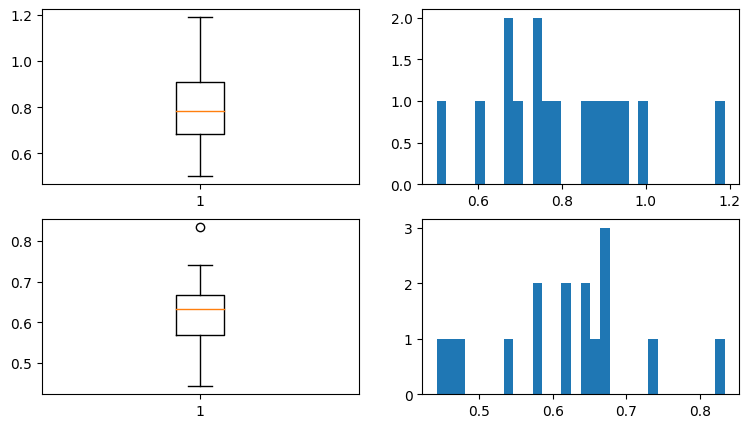

In [87]:
fig = plt.figure(figsize=(9, 5))

plt.subplot(2, 2, 1)
plt.boxplot(df_h_n['rrn_mean_l'])

plt.subplot(2, 2, 2)
plt.hist(df_h_n['rrn_mean_l'], bins=30)

plt.subplot(2, 2, 3)
plt.boxplot(df_h_n['rrn_mean_s'])

plt.subplot(2, 2, 4)
plt.hist(df_h_n['rrn_mean_s'], bins=30)

plt.show()

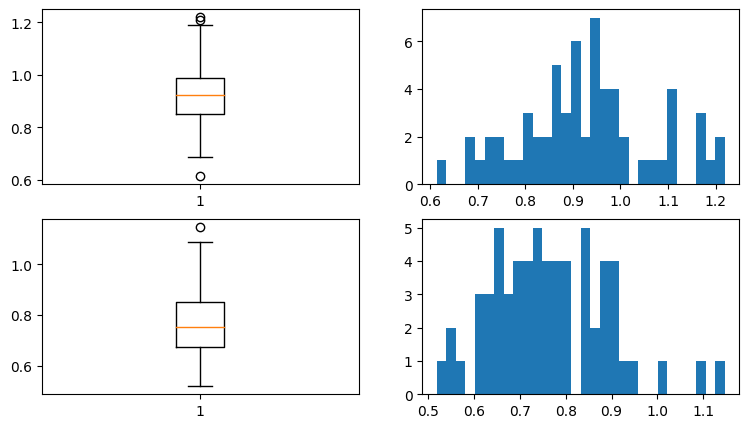

In [88]:
fig = plt.figure(figsize=(9, 5))


plt.subplot(2, 2, 1)
plt.boxplot(df_ag_n['rrn_mean_l'])

plt.subplot(2, 2, 2)
plt.hist(df_ag_n['rrn_mean_l'], bins=30)

plt.subplot(2, 2, 3)
plt.boxplot(df_ag_n['rrn_mean_s'])

plt.subplot(2, 2, 4)
plt.hist(df_ag_n['rrn_mean_s'], bins=30)

plt.show()

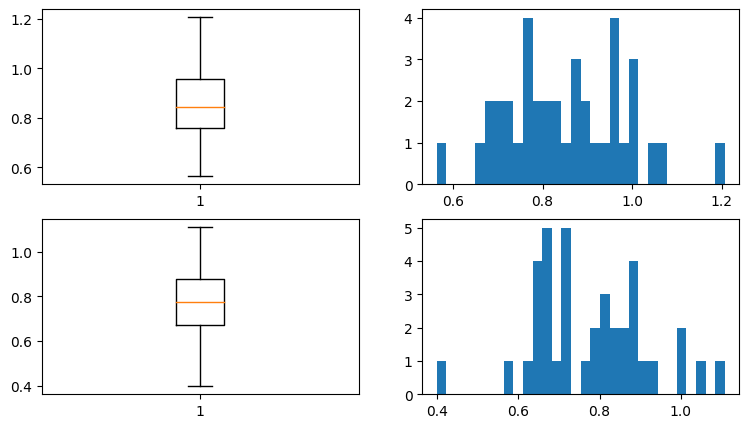

In [89]:
fig = plt.figure(figsize=(9, 5))


plt.subplot(2, 2, 1)
plt.boxplot(df_im6_n['rrn_mean_l'])

plt.subplot(2, 2, 2)
plt.hist(df_im6_n['rrn_mean_l'], bins=30)

plt.subplot(2, 2, 3)
plt.boxplot(df_im6_n['rrn_mean_s'])

plt.subplot(2, 2, 4)
plt.hist(df_im6_n['rrn_mean_s'], bins=30)

plt.show()

Посмотрев на графики по всем группам можно заметить, что значение rrn в положении лежа выше чем в положении стоя, изходя из этого можно предположить что это статистически различные данные

## Проверка распределений на нормальность

Проведем исследование на нормальность используя тест Шапиро-Уилка, тк он хорошо работает с небольшими выборками

НО: данные расспределены нормально
Н1: данные распределены ненормально

In [90]:
#здоровые
shapiro_test_l = stats.shapiro(df_h_n['rrn_mean_l'])
shapiro_test_s = stats.shapiro(df_h_n['rrn_mean_s'])
print(shapiro_test_l)
print(shapiro_test_s)

ShapiroResult(statistic=0.9823820185690773, pvalue=0.9796206597701868)
ShapiroResult(statistic=0.954302998381007, pvalue=0.5607560911763091)


In [91]:
#AG
shapiro_test_l = stats.shapiro(df_ag_n['rrn_mean_l'])
shapiro_test_s = stats.shapiro(df_ag_n['rrn_mean_s'])
print(shapiro_test_l)
print(shapiro_test_s)

ShapiroResult(statistic=0.9789116455349278, pvalue=0.35204711781711034)
ShapiroResult(statistic=0.9735328497420663, pvalue=0.19191356049573055)


In [92]:
#im6
shapiro_test_l = stats.shapiro(df_im6_n['rrn_mean_l'])
shapiro_test_s = stats.shapiro(df_im6_n['rrn_mean_s'])
print(shapiro_test_l)
print(shapiro_test_s)

ShapiroResult(statistic=0.9836330819566339, pvalue=0.8404332573389867)
ShapiroResult(statistic=0.9755360690476548, pvalue=0.5608039369618196)


**pvalue > 0.05, нет оснований отвергать гипотезу о нормальности**

1. На графиках видно, что rrn в положении лежа в среднем больше, чем rrn в положении стоя, у всех групп.

2. Исходя из значений в графиках предположим, что при переходе из положения лежа в положение стоя, rrn становиться меньше, то есть ЧСС увеличивается.

*   H0(нулевая гипотеза) - При переходе из положения лежа в положение стоя, rrn не изменяется, то есть ЧСС тоже не изменяется.
*   H1(альтернативная гипотеза) - При переходе из положения лежа в положение стоя, rrn изменяется, то есть ЧСС тоже изменяется.

Также на графиках видно, что rrn в положении лежа в среднем больше, чем rrn в положении стоя, значит если нулевая гипотеза отвергается, сразу можно сказать что при переходе из положения лежа в положение стоя, rrn становиться меньше, то есть ЧСС увеличивается.

**Мы будем использовать T-критерий. Тестироваться данные будут на разных группах пациентов.**

In [93]:
print(stats.ttest_ind(a=df_h_n['rrn_mean_s'], b=df_h_n['rrn_mean_l']))
print(stats.ttest_ind(a=df_ag_n['rrn_mean_s'], b=df_ag_n['rrn_mean_l']))
print(stats.ttest_ind(a=df_im6_n['rrn_mean_s'], b=df_im6_n['rrn_mean_l']))

TtestResult(statistic=-3.784968292991548, pvalue=0.0006870300884893342, df=30.0)
TtestResult(statistic=-6.95968470589087, pvalue=1.7485621009149946e-10, df=124.0)
TtestResult(statistic=-2.313937921556342, pvalue=0.023449984505494792, df=74.0)


Поскольку p-значение нашего теста у всех групп меньше, чем альфа = 0,05, у нас нет сонований принять нулевуюю гипотезу теста. У нас есть данные, чтобы сказать, что у всех групп пациентов статистически значимо меняется rrn при переходе из положения стоя в положение лежа.

# **Далее изучим различия между группами пациентов(H, AG, IM6)**

In [94]:
df = df[df['patient'] != 'IM']

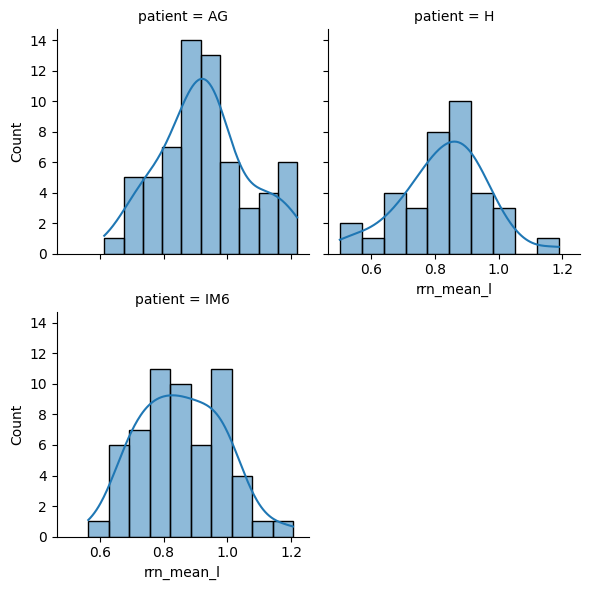

In [95]:
g = sns.FacetGrid (data=df, col='patient', col_wrap=2)
g.map(sns.histplot , 'rrn_mean_l', bins=10, kde=True)

Ранее мы проверяли эти выборки на нормальность, поэтому можем пперейти к тестированию

Н0: Выборки не имеют статистически значимого различия
Н1: Выборки имеют статистически значимое различие

In [96]:
print(stats.ttest_ind(a=df_h['rrn_mean_l'].dropna(), b=df_ag['rrn_mean_l'].dropna()))
print(stats.ttest_ind(a=df_h['rrn_mean_l'].dropna(), b=df_im6['rrn_mean_l'].dropna()))
print(stats.ttest_ind(a=df_ag['rrn_mean_l'].dropna(), b=df_im6['rrn_mean_l'].dropna()))

TtestResult(statistic=-3.35599561514768, pvalue=0.0011263419955933915, df=98.0)
TtestResult(statistic=-0.8974965909283347, pvalue=0.37179669028603324, df=92.0)
TtestResult(statistic=2.889335231079348, pvalue=0.004582373422801546, df=120.0)


Поскольку p-значение нашего теста у групп: H и AG и H и IM6 меньше, чем альфа = 0,05, у нас нет сонований принять нулевуюю гипотезу теста. Эти данные имеют статистически значимые критерии и принаджлежат разным генеральным совокупностям

Но р-значение у групп H и IM6 более a=0,05, а значит мы не может отвергнуть нулевую гипотезу